### **NLP_RATINGS, NUWE CHALLENGE**

In [49]:
# Ahora puedes importar tus módulos
from src.data_preprocessing import load_data, preprocess_text, vectorize_data
from src.model import train_model, predict
from src.evaluation import compute_metrics, get_classification_report, compute_confusion_matrix
from src.cross_validation import perform_cross_validation
from src.visualization import plot_confusion_matrix

from sklearn.model_selection import train_test_split

import json

In [50]:
# Cargar datos
train_data, test_data = load_data('train/train.csv', 'test/test.csv')

# Preprocesar datos
train_data, test_data = preprocess_text(train_data, test_data)

In [56]:
# Comprobar si hay valores NaN en las columnas 'Summary' y 'Text'
train_data[['Summary', 'Text', 'full_text']].isnull().sum()

Summary      0
Text         0
full_text    0
dtype: int64

In [55]:
# Eliminar filas con NaN en 'Summary' o 'Text'
train_data.dropna(subset=['Summary', 'Text'], inplace=True)

In [57]:
train_data.shape

(20929, 4)

In [58]:
train_data.head()

,Score,Summary,Text,full_text
0,1,Why the white tea blend?,I really cannot emphasize how disappointed I a...,Why the white tea blend? I really cannot empha...
1,1,Horrible quality,The shipment I received had soooooo much powde...,Horrible quality The shipment I received had s...
2,4,The Jalapeno Story,I love the taste of jalapenos but not if they'...,The Jalapeno Story I love the taste of jalapen...
3,5,Addictive!,These sunflower seeds are incredible. They ar...,Addictive! These sunflower seeds are incredibl...
4,5,Brings back memories of my Mother's lemon pies,My sister and I were discussing how delicious ...,Brings back memories of my Mother's lemon pies...


In [61]:
test_data[['Summary', 'Text', 'full_text']].isnull().sum()

Summary      0
Text         0
full_text    0
dtype: int64

In [60]:
# Imputar valores nulos con un texto genérico
test_data['Summary'].fillna('No summary', inplace=True)
test_data['Text'].fillna('No text', inplace=True)
test_data['full_text'].fillna('No text No summary', inplace=True)

/tmp/ipykernel_971639/3479742887.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Summary'].fillna('No summary', inplace=True)
/tmp/ipykernel_971639/3479742887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [62]:
test_data.shape

(9000, 4)

In [63]:
test_data.head()

,Test_id,Summary,Text,full_text
0,1,Smooth,"This is so far my favorite K-Cup. Very rich, ...",Smooth This is so far my favorite K-Cup. Very...
1,2,"Full Bodied, Rich Taste",I recently was in Winthrop on vacation and had...,"Full Bodied, Rich Taste I recently was in Wint..."
2,3,first time bonsai -- fantastic!,For your first bonsai plant..,first time bonsai -- fantastic! For your first...
3,4,very tasty :),"This sesame oil is rich and aromatic, definite...",very tasty :) This sesame oil is rich and arom...
4,5,Are you kidding me?,I can not believe the lack of packaging from t...,Are you kidding me? I can not believe the lack...


In [64]:
# Preparar la variable objetivo
y_train = train_data['Score']

In [65]:
test_id = test_data['Test_id']

In [66]:
train_data.drop('Score', axis=1, inplace=True)
test_data.drop('Test_id', axis=1, inplace=True)

In [67]:
train_data.columns

Index(['Summary', 'Text', 'full_text'], dtype='object')

In [68]:
# Vectorizar datos
X_train, X_test, vectorizer = vectorize_data(train_data, test_data)

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [70]:
# Entrenar el modelo
model = train_model(X_train, y_train)

# Predicciones
y_val_pred = predict(model, X_val)

In [71]:
# Calcular métricas
f1, precision, recall = compute_metrics(y_val, y_val_pred)
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

F1 Score: 0.6017041621619685
Precision: 0.5976499277304537
Recall: 0.6669851887243191


In [72]:
# Obtener el reporte de clasificación
report = get_classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

           1       0.55      0.42      0.48       384
           2       0.31      0.05      0.08       242
           3       0.40      0.16      0.22       316
           4       0.38      0.14      0.20       644
           5       0.71      0.95      0.81      2600

    accuracy                           0.67      4186
   macro avg       0.47      0.34      0.36      4186
weighted avg       0.60      0.67      0.60      4186



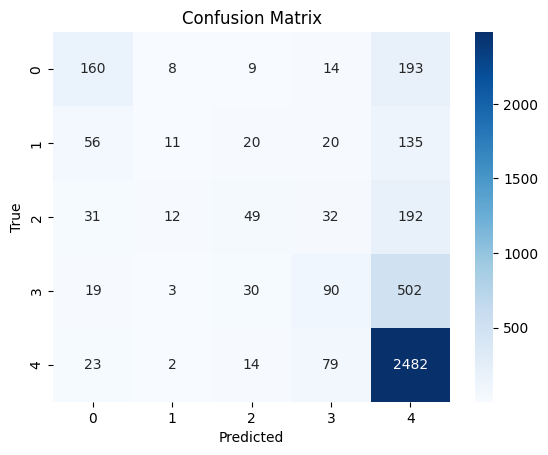

In [73]:
# Visualizar la matriz de confusión
plot_confusion_matrix(y_val, y_val_pred)

In [74]:
# Realizar validación cruzada (opcional)
cv_score = perform_cross_validation(model, X_train, y_train)
print(f'Cross-validated F1 Score: {cv_score}')

Cross-validated F1 Score: 0.6183051117852976


In [75]:
# Realizar predicciones para el conjunto de test entregado
predictions = model.predict(X_test)

In [76]:
predictions = predictions.tolist()

In [77]:
test_data['Test_id'] = test_id

In [78]:
# Crear el diccionario de predicciones
predictions_dict = {
    "target": dict(zip(test_data['Test_id'], predictions))
}

In [81]:
len(predictions_dict["target"])

9000

In [79]:
# Guardar las predicciones en formato JSON
with open('predictions/predictions.json', 'w') as f:
    json.dump(predictions_dict, f)